In [27]:
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA  

final_data = "C:/Users/HUY/Desktop/my_project/final_data"
synthetic_path = "C:/Users/HUY/Desktop/my_project/synthetic_data"

# tải dữ liệu dựa theo góc của dáng đi
def load_view(folder_paths, view):
    train, test = [], []
    for folder in os.listdir(folder_paths):
        if folder == "train":
            tr_labels = []
            for img in os.listdir(f"{folder_paths}/{folder}"):
                if view in img:
                    im = np.array(cv2.imread(f"{folder_paths}/{folder}/{img}", cv2.IMREAD_GRAYSCALE))
                    tr_labels.append(img[0:3])
                    train.append(im)
        if folder == "test":
            te_labels = []
            for img in os.listdir(f"{folder_paths}/{folder}"):
                if view in img:
                    im = np.array(cv2.imread(f"{folder_paths}/{folder}/{img}", cv2.IMREAD_GRAYSCALE))
                    te_labels.append(img[0:3])
                    test.append(im)
    print(f"Hoàn thành tải dữ liệu lên từ {folder_paths} với góc {view} độ")
    return train, test, tr_labels, te_labels

# tải dữ liệu dáng đi với tất cả các góc
def load_data():
    views = ["000","018","036","054","072","090","108","126","144","162","180"]
    x_train, y_train = [], []
    x_test, y_test = [], []
    
    for view in views:
        x_rtrain_view, x_rtest_view, y_rtrain_view, y_rtest_view = load_view(final_data, view)
        x_strain_view, x_stest_view, y_strain_view, y_stest_view = load_view(synthetic_path, view)
        
        x_train = x_train + x_rtrain_view + x_strain_view
        y_train = y_train + y_rtrain_view + y_strain_view
        x_test = x_test + x_rtest_view + x_stest_view
        y_test = y_test + y_rtest_view + y_stest_view
        
    print(f"Kích thước tập train và nhãn: {len(x_train)} và {len(y_train)}")
    print(f"Kích thước tập test và nhãn: {len(x_test)} và {len(y_test)}")
    return x_train, y_train, x_test, y_test

In [28]:
x_train, y_train, x_test, y_test = load_data()

Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/final_data với góc 000 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/synthetic_data với góc 000 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/final_data với góc 018 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/synthetic_data với góc 018 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/final_data với góc 036 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/synthetic_data với góc 036 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/final_data với góc 054 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/synthetic_data với góc 054 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/final_data với góc 072 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/synthetic_data với góc 072 độ
Hoàn thành tải dữ liệu lên từ C:/Users/HUY/Desktop/my_project/final_data với góc 090 độ
Hoàn thành t

In [29]:
pca = PCA(n_components = 16)
x_train = pca.fit_transform([x.flatten() for x in x_train])
x_test = pca.transform([x.flatten() for x in x_test])

print(f"Kích thước của tập train sau khi PCA: {x_train.shape}")
print(f"Kích thước của tập test sau khi PCA: {x_test.shape}")

Kích thước của tập train sau khi PCA: (5668, 16)
Kích thước của tập test sau khi PCA: (2834, 16)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# phân loại bằng RandomForest
accuracy = []
for i in range(5):
    rf_model = RandomForestClassifier(
        n_estimators=300, max_depth=20, 
        min_samples_split=2,min_samples_leaf=1,
        max_features='sqrt',bootstrap=True
        )
    rf_model.fit(x_train, y_train) # huấn luyện với tập train
    y_pred = rf_model.predict(x_test) # dự đoán với tập test
    
    accuracy.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy: {accuracy[i] * 100:.2f}%') # in ra độ chính xác

print(f'Average Accuracy: {np.mean(accuracy) * 100:.2f}%')

Accuracy: 98.09%
Accuracy: 98.24%
Accuracy: 98.27%
Accuracy: 97.99%
Accuracy: 98.34%
Average Accuracy: 98.19%


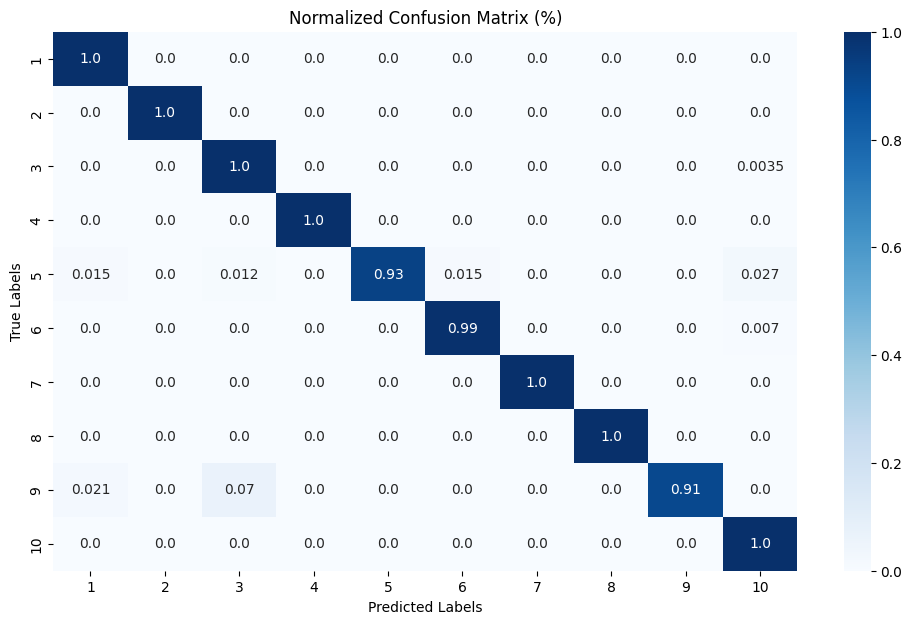

In [54]:
# In ra Ma trận Confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo confusion matrix (dạng số lượng)
cm = confusion_matrix(y_test, y_pred)

# Chuyển về dạng phần trăm theo từng hàng (theo lớp thực tế)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ heatmap dạng phần trăm
plt.figure(figsize=(12, 7))
class_names = [1,2,3,4,5,6,7,8,9,10]
sns.heatmap(cm_normalized, annot=True, fmt='.2', cmap='Blues',xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix (%)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

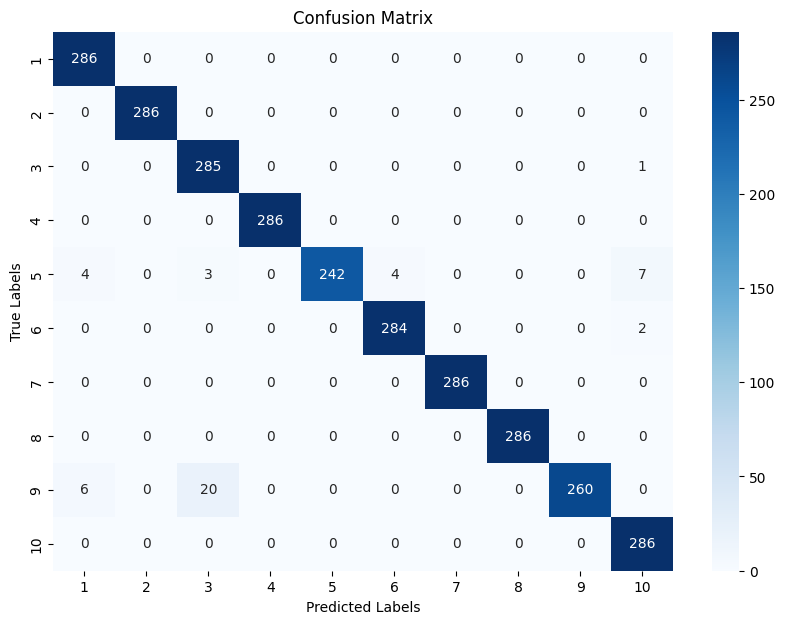

In [56]:
cm = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()